In [4]:
import numpy as np
from numpy import ndarray
from typing import Dict, Tuple
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

In [5]:
diabetes = load_diabetes()

data = diabetes.data
target = diabetes.target

diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]], shape=(442, 10)),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142.

In [6]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()

data_x = data.astype(float)
target_x = target.astype(float)

target_x = target.reshape(-1, 1)

data_x = s.fit_transform(data_x)
target_x = s.fit_transform(target_x)



In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_x, target_x, test_size=0.3, random_state=80718)

y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)

In [8]:
from sklearn.linear_model import LinearRegression


lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

In [9]:
# from sklearn.metrics import accuracy_score
# accuracy_score(y_test, preds)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, preds)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.49182926282045714


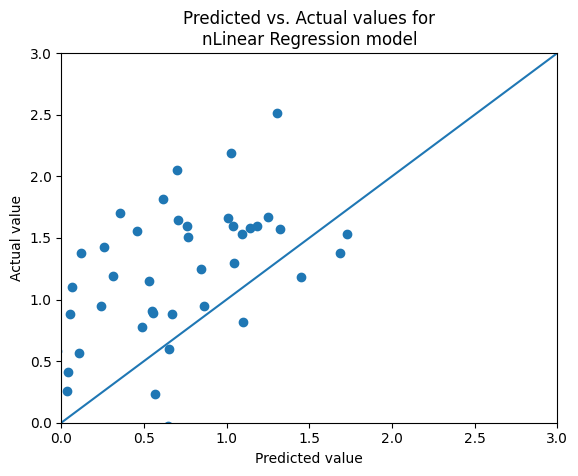

In [10]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Predicted vs. Actual values for\nnLinear Regression model")
plt.xlim([0, 3])
plt.ylim([0, 3])
plt.scatter(preds, y_test)
plt.plot([0, 5], [0, 5])


Text(0.5, 1.0, 'Relationship between most\nimportant feature and target')

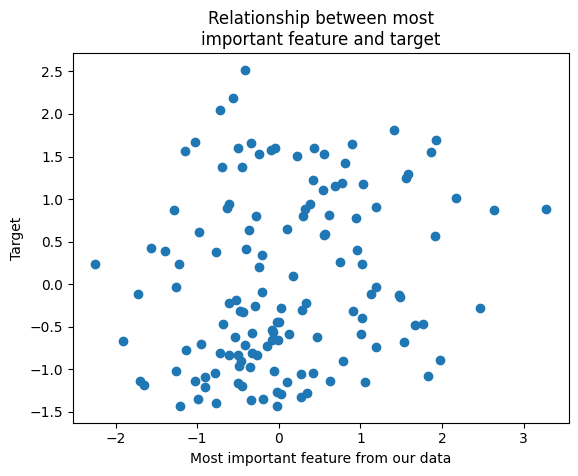

In [124]:
plt.scatter(X_test[:, 5], y_test)
plt.xlabel("Most important feature from our data")
plt.ylabel("Target")
plt.title("Relationship between most\nimportant feature and target")

# Manual Linear regression: the code

In [13]:
np.random.seed(190204)
X = np.random.randn(3, 3)
W = np.random.randn(3, 2)

In [14]:
# first, we perform a “forward pass,” passing the input successively forward through a series 
# of operations and saving the quantities computed as we go;

def forward_linear_regression(X_batch: ndarray,
                              y_batch: ndarray,
                              weights: Dict[str, ndarray]) -> Tuple[float, Dict[str, ndarray]]:
    
    # assert that batch sizes of X and y are equal
    assert X_batch.shape[0] == y_batch.shape[0]

    # assert that the matrix multipication can work
    assert X_batch.shape[1] == weights['W'].shape[0]

    # assert that B is simply a 1x1 ndarray
    assert weights['B'].shape[0] == weights['B'].shape[1] == 1

    # compute the operations on the forward pass
    N = np.dot(X_batch, weights['W'])

    P = N+ weights['B']

    loss = np.mean(np.power(y_batch - P, 2))

    # save the information computed on the froward pass
    forward_info: Dict[str, ndarray] = {}
    forward_info['X'] = X_batch
    forward_info['N'] = N
    forward_info['P'] = P
    forward_info['y'] = y_batch
    
    return loss, forward_info

Since the “forward pass” of this function was passing the input through a series of nested functions, the backward pass will simply involve computing the partial derivatives of each function, evaluating those derivatives at the functions’ inputs, and multiplying them together

In [3]:
def to_2d_np(a: ndarray,
             type: str = "col") -> ndarray:
    """
    Turns a 1D Tensor into 2D
    """
    assert a.ndim == 1
    
    if type == "col":
        return a.reshape(-1, 1)
    elif type == "row":
        return a.reshape(1, -1)

In [4]:
def permute_data(X: ndarray, y: ndarray):
    perm = np.random.permutation(X.shape[0])
    return X[perm], y[perm]

In [5]:
def loss_gradients(forward_info: Dict[str, ndarray],weights: Dict[str, ndarray]) -> Dict[str, ndarray]:
    
    batch_size = forward_info['X'].shape[0]
    
    dLdP = -2 * (forward_info['y'] - forward_info['P'])
    
    dPdN = np.ones_like(forward_info['N'])
    
    dPdB = np.ones_like(weights['B'])
    
    dLdN = dLdP * dPdN
    
    dNdW = np.transpose(forward_info['X'], (1, 0))
    
    # need to use matrix multiplication here,
    # with dNdW on the left (see note at the end of last chapter)
    dLdW = np.dot(dNdW, dLdN)

    # need to sum along dimension representing the batch size
    # (see note near the end of this chapter)
    dLdB = (dLdP * dPdB).sum(axis=0)

    loss_gradients: Dict[str, ndarray] = {}
    loss_gradients['W'] = dLdW
    loss_gradients['B'] = dLdB
    
    return loss_gradients

In [6]:
Batch = Tuple[ndarray, ndarray]

def generate_batch(X: ndarray, 
                   y: ndarray,
                   start: int = 0,
                   batch_size: int = 10) -> Batch:
    '''
    Generate batch from X and y, given a start position
    '''
    assert X.ndim == y.ndim == 2, \
    "X and Y must be 2 dimensional"

    if start+batch_size > X.shape[0]:
        batch_size = X.shape[0] - start
    
    X_batch, y_batch = X[start:start+batch_size], y[start:start+batch_size]
    
    return X_batch, y_batch

In [7]:
def forward_loss(X: ndarray,
                 y: ndarray,
                 weights: Dict[str, ndarray]) -> Tuple[Dict[str, ndarray], float]:
    '''
    Generate predictions and calculate loss for a step-by-step linear regression
    (used mostly during inference).
    '''
    N = np.dot(X, weights['W'])

    P = N + weights['B']

    loss = np.mean(np.power(y - P, 2))

    forward_info: Dict[str, ndarray] = {}
    forward_info['X'] = X
    forward_info['N'] = N
    forward_info['P'] = P
    forward_info['y'] = y

    return forward_info, loss

In [8]:
def init_weights(n_in: int) -> Dict[str, ndarray]:
    '''
    Initialize weights on first forward pass of model.
    '''
    
    weights: Dict[str, ndarray] = {}
    W = np.random.randn(n_in, 1)
    B = np.random.randn(1, 1)
    
    weights['W'] = W
    weights['B'] = B

    return weights

In [9]:
def train(X: ndarray, 
          y: ndarray, 
          n_iter: int = 1000,
          learning_rate: float = 0.01,
          batch_size: int = 100,
          return_losses: bool = False, 
          return_weights: bool = False, 
          seed: int = 1) -> None:
    '''
    Train model for a certain number of epochs.
    '''
    if seed:
        np.random.seed(seed)
    start = 0

    # Initialize weights
    weights = init_weights(X.shape[1])

    # Permute data
    X, y = permute_data(X, y)
    
    if return_losses:
        losses = []

    for i in range(n_iter):
# Generate batch
        if start >= X.shape[0]:
            X, y = permute_data(X, y)
            start = 0
        
        X_batch, y_batch = generate_batch(X, y, start, batch_size)
        start += batch_size
    
        # Train net using generated batch
        forward_info, loss = forward_loss(X_batch, y_batch, weights)

        if return_losses:
            losses.append(loss)

        loss_grads = loss_gradients(forward_info, weights)
        for key in weights.keys():
            weights[key] -= learning_rate * loss_grads[key]

    if return_weights:
        return losses, weights
    
    return None


In [18]:
train_info = train(X_train, y_train,
                   n_iter = 1000,
                   learning_rate = 0.001,
                   batch_size=23, 
                   return_losses=True, 
                   return_weights=True, 
                   seed=180708)
losses = train_info[0]
weights = train_info[1]

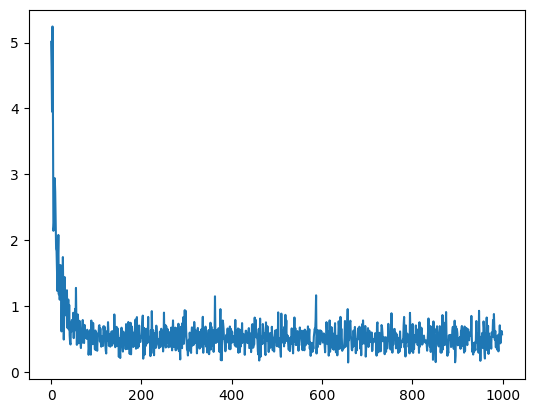

In [19]:

plt.plot(list(range(1000)), losses);

In [12]:
forward_info, loss = forward_loss(X_batch, y_batch, weights)

loss_grads = loss_gradients(forward_info, weights)

for key in weights.keys():
    weights[key] -= learning_rate * loss_grads[key]

NameError: name 'forward_loss' is not defined